In [1]:
from scipy.spatial import ckdtree
import numpy as np
from tqdm import tqdm as tqdm
import matplotlib.pyplot as plt

In [13]:
l = 1
d = l*1e-2
epsilon = d*1e-3

In [79]:
N = 2000 #number of vertexes
M = 100 #number of segment adding iteration between adding vertices

In [65]:
def random_vertex():
    x, y = np.random.random(2)*2*l-l
    return np.array([x,y])

def find_segments(vertices, segments):
    active_segments = [] #segmenty które będą się rozrastać
    segments_vertices = [] #krawędzie do których będzie rozrastać się segment na odpowiednim miejscu powyżej
    tree = ckdtree.cKDTree(segments)
    for i in range(len(vertices)-1,-1,-1):
        dist, nearest_segments = tree.query(vertices[i])
        if dist < d:
            del vertices[i]
    for i in range(len(vertices)):
        dist, nearest_segments = tree.query(vertices[i],5)
        close = [True]
        close.extend((np.diff(dist)<epsilon).tolist())
        for s in nearest_segments[close]:
            active_segments.append(segments[s])
            segments_vertices.append([i])
            
#             if s in active_segments:
# #                 index = active_segments.index(s)
# #                 segments_vertices[index].extend([i])
#                 active_segments.append(s)
#                 segments_vertices.append([i])
#             else:
#                 active_segments.append(s)
#                 segments_vertices.append([i])
    
    return active_segments, segments_vertices

In [82]:
def run(N=N,M=M):
    segments = [(0,0)]
    active_vertices = []
    visual = []
    for n in tqdm(range(N)):
        active_vertices.append(random_vertex())
        active_segments, segments_vertices = find_segments(active_vertices, segments)
    #     print(active_segments,segments_vertices)

        for m in range(M):
            if (len(active_segments)-len(segments_vertices)) != 0:
                print("alarm")
            for i in range(len(active_segments)-1, -1, -1):
                del_x = active_vertices[segments_vertices[i][0]][0] - active_segments[i][0]
                del_y = active_vertices[segments_vertices[i][0]][1] - active_segments[i][1]
                r = (del_x**2 + del_y**2)**0.5
                if r > d:
                    new_seg = (active_segments[i][0]+del_x*d/r,active_segments[i][1]+del_y*d/r)
                    segments.append(new_seg)
                    visual.append([active_segments[i],new_seg])
                    active_segments[i] = new_seg
                else:
                    del segments_vertices[i]
                    del active_segments[i]
    #                 segments_vertices.remove(segments_vertices[i])
    #                 active_segments.remove(active_segments[i])

    while active_vertices != []:
        active_segments, segments_vertices = find_segments(active_vertices, segments)

    # active_vertices = np.vstack(active_vertices).T
    segments = np.vstack(np.array(segments)).T
    visual = np.array(visual).T


  0%|          | 0/2000 [00:00<?, ?it/s]/home/paulina/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()

100%|██████████| 2000/2000 [00:08<00:00, 228.91it/s]

In [49]:
# active_vertices.remove(active_vertices[0])
active_vertices

[array([-0.96725518, -0.25275935]), array([-0.208202  , -0.23287305])]

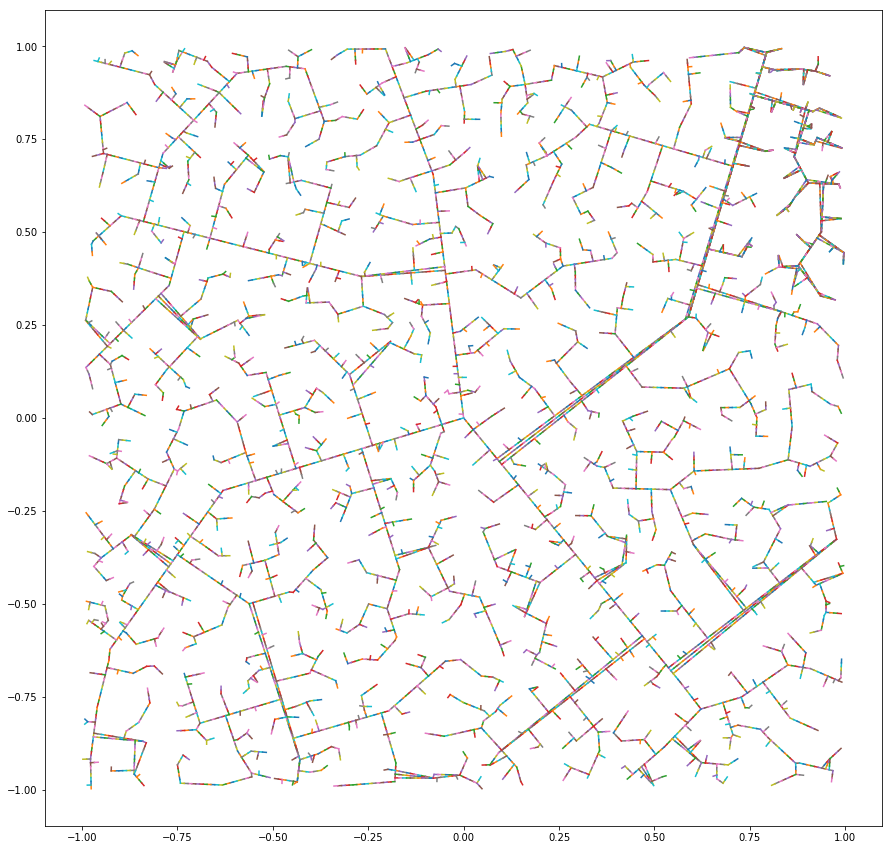

In [83]:
fig = plt.figure(figsize=[15,15])
# plt.plot(segments[0],segments[1],'.')
plt.plot(visual[0],visual[1])
if active_vertices != []:
    plt.plot(active_vertices[0],active_vertices[1],'o')
# plt.savefig("takze_tego1.png")